In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
#plt.colorbar()
plt.grid(False)
plt.suptitle('First Training Image', fontsize=16)
plt.show()
print("First training label: ", train_labels[0])

In [3]:
# load clothes dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

print("Shape of the training dataset, number of images and resolution:", train_images.shape)
print("All distinct training labels:", np.unique(train_labels))

4431872/4422102 [==============================] - 0s 0us/step
Shape of the training dataset, number of images and resolution: (60000, 28, 28)
All distinct training labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),       #input_shape=(28, 28) for clothes
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)
print(history.history)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.9608 - accuracy: 0.7450 - val_loss: 0.6078 - val_accuracy: 0.7977
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.5767 - accuracy: 0.8094 - val_loss: 0.5823 - val_accuracy: 0.8020
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5254 - accuracy: 0.8197 - val_loss: 0.6262 - val_accuracy: 0.7818
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4970 - accuracy: 0.8296 - val_loss: 0.5402 - val_accuracy: 0.8098
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4679 - accuracy: 0.8375 - val_loss: 0.4874 - val_accuracy: 0.8350
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4562 - accuracy: 0.8416 - val_loss: 0.4899 - val_accuracy: 0.8317
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4314 - accuracy: 0.8492 - val_loss: 0.4623 - val_accuracy:

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_images, test_labels, batch_size=128)
print("test loss, test acc:", results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(test_images[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.8395
test loss, test acc: [0.4703132212162018, 0.8395000100135803]
Generate predictions for 3 samples
predictions shape: (3, 10)


In [ ]:
num_layers = [2,3]
num_nodes = [64,128]
activation_func = ["sigmoid", "relu"]
num_epochs = 10
#tr_images = train_images[:1000]
#tr_labels = train_labels[:1000]
train_results = []

for func in activation_func:
  for nodes in num_nodes:
    for lay in num_layers:
      model = keras.Sequential()
      model.add(keras.layers.Flatten(input_shape=(28, 28)))
      for layer in range(lay):
        model.add(keras.layers.Dense(nodes,activation=func)) 
      model.add(keras.layers.Dense(10))
      model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
      print("Activation Function: " + func + " Number of nodes: " + str(nodes) + " Number of hidden layers: " + str(lay))
      history = model.fit(train_images, train_labels, epochs=num_epochs, validation_split=0.1)
      train_results.append([history.history["val_accuracy"][num_epochs-1],func, nodes, lay, history.history["accuracy"][num_epochs-1]])
      print()

print(train_results)
max_accuracy = max(train_results)
print()
print("The best hyperparameter combination is -> Activation Function: " + max_accuracy[1] + " Number of Nodes: " + str(max_accuracy[2]) + " Number of Layers: " + str(max_accuracy[3]))
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
for lay in range(max_accuracy[3]):
  model.add(keras.layers.Dense(max_accuracy[2],activation=max_accuracy[1])) 
model.add(keras.layers.Dense(10))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])      
history = model.fit(train_images, train_labels, epochs=num_epochs)     
print()
# Evaluate the best model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_images, test_labels, batch_size=128)
print("test loss, test acc:", results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(test_images[:3])
print("predictions shape:", predictions.shape)




Activation Function: sigmoid Number of nodes: 64 Number of hidden layers: 2
Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.0578 - accuracy: 0.6325 - val_loss: 0.7857 - val_accuracy: 0.7175
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7972 - accuracy: 0.6918 - val_loss: 0.7665 - val_accuracy: 0.7045
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7531 - accuracy: 0.7040 - val_loss: 0.7836 - val_accuracy: 0.7092
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7706 - accuracy: 0.7081 - val_loss: 0.7613 - val_accuracy: 0.7053
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7605 - accuracy: 0.7004 - val_loss: 0.7486 - val_accuracy: 0.7180
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.7395 - accuracy: 0.7084 - val_loss: 0.7227 - val_accuracy: 0.7060
Epoch 7/10
 640/1688 [==========>...................] - ETA:

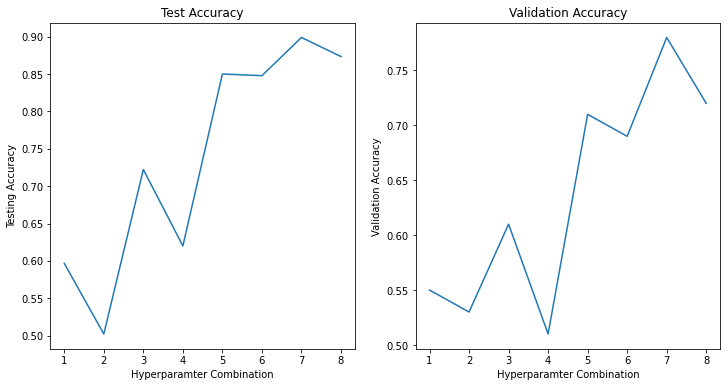

In [43]:
y1 = []
y2 = []
for i in train_results:
  y1.append(i[0])
  y2.append(i[4])

y1 = np.asarray(y1)
y2 = np.asarray(y2)
x = np.arange(1,9)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot("121")
ax.set_title("Test Accuracy")
ax.set_xlabel("Hyperparamter Combination")
ax.set_ylabel("Testing Accuracy")
ax.plot(x,y2)
ax = fig.add_subplot("122")
ax.set_title("Validation Accuracy")
ax.set_xlabel("Hyperparamter Combination")
ax.set_ylabel("Validation Accuracy")
ax.plot(x,y1)

plt.show()